In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.core.debugger import set_trace

In [31]:
df_x = pd.read_csv('..//../Data/oil_fatty_acids.csv')
df_y = pd.read_csv('..//../Data/oil_type.csv')
df_x.drop(columns='Unnamed: 0', inplace=True)
df_y.drop(columns='Unnamed: 0', inplace=True)
df_y.rename(columns={'x': 'y'}, inplace=True)

In [32]:
df_x

,Palmitic,Stearic,Oleic,Linoleic,Linolenic,Eicosanoic,Eicosenoic
0,9.7,5.2,31.0,52.7,0.4,0.4,0.1
1,11.1,5.0,32.9,49.8,0.3,0.4,0.1
2,11.5,5.2,35.0,47.2,0.2,0.4,0.1
3,10.0,4.8,30.4,53.5,0.3,0.4,0.1
4,12.2,5.0,31.1,50.5,0.3,0.4,0.1
...,...,...,...,...,...,...,...
91,10.7,1.8,30.2,55.5,0.9,0.5,0.3
92,4.5,1.7,64.9,18.6,8.3,0.1,0.1
93,5.7,2.1,54.6,26.8,8.0,0.1,0.1
94,6.2,2.2,52.2,29.0,8.0,0.1,0.1


In [33]:
df_y

,y
0,A
1,A
2,A
3,A
4,A
...,...
91,G
92,F
93,F
94,F


(array([37., 26.,  3.,  7., 11., 10.,  2.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

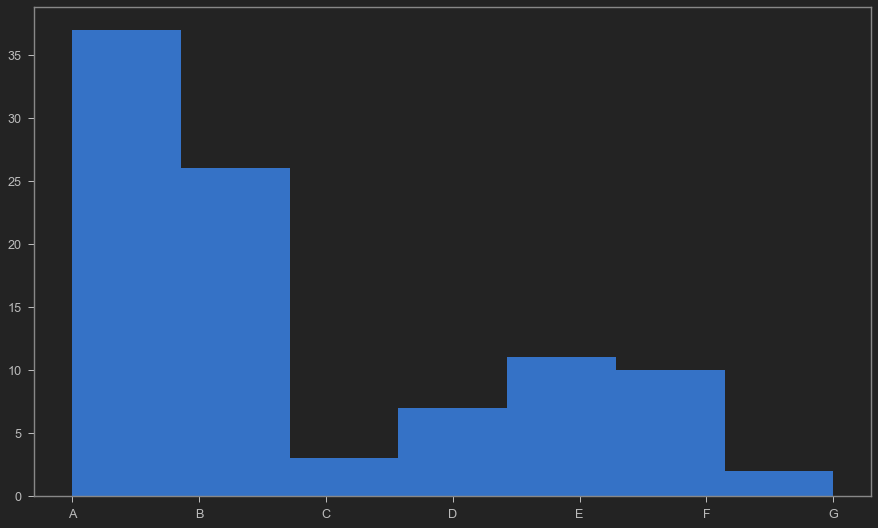

In [36]:
plt.hist(df_y.sort_values('y'), bins=len(df_y['y'].unique()))

### Sampling randomly

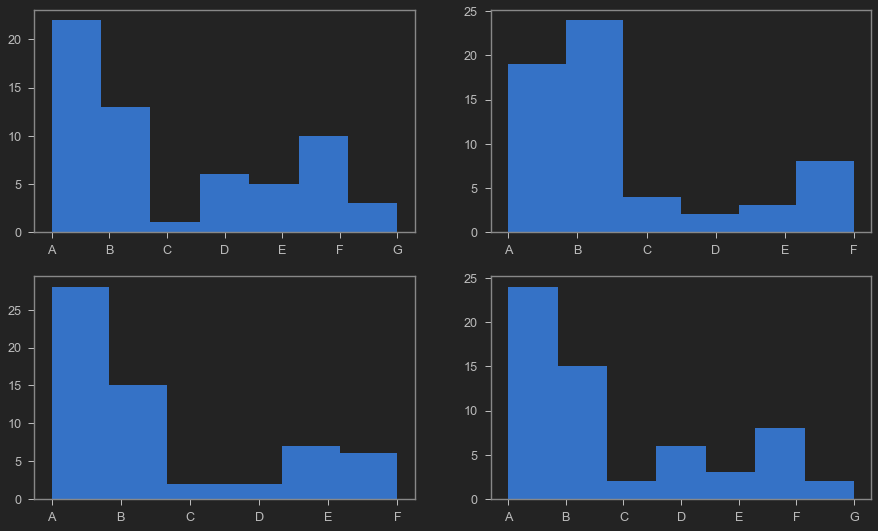

In [47]:
# Here I could use sklearn.model_selection.ShuffleSplit. It would be equivalent.
fig, axes = plt.subplots(ncols=2, nrows=2)
for ax in axes.flatten():
    samples = df_y.iloc[np.random.randint(low=0, high=df_y.shape[0], size=60)]
    ax.hist(samples.sort_values('y'), bins=len(samples['y'].unique()));

### The disributions are not consistent.

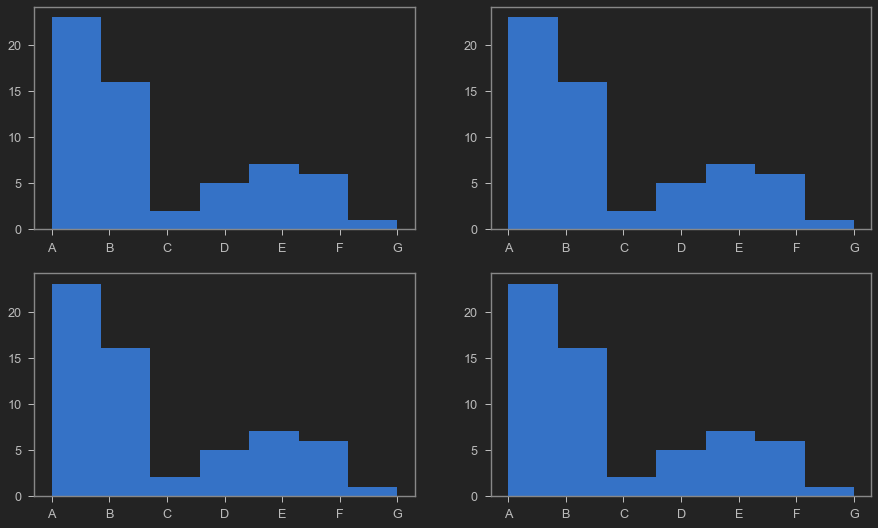

In [57]:
n_splits = 4
train_size = 60 / df_y.shape[0]
sss = StratifiedShuffleSplit(n_splits=n_splits, train_size=train_size)
fig, axes = plt.subplots(ncols=2, nrows=2)
axes = axes.flatten()
for i, (train_index, test_index) in enumerate(sss.split(df_x, df_y)):
#     set_trace()
    axes[i].hist(df_y.iloc[train_index].sort_values('y'), bins=len(df_y['y'].unique()));

### Here, using stratification, the distrubutions are the same.